In [1]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 23.1 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/week_data.csv")
print(df.shape)
df.head


(66, 344)


<bound method NDFrame.head of     weeks  TE50011  TE50012  TE50013  TE50014  TE50015  TE50016  TE50017  \
0       1    20160    59400        0        0      770        0      216   
1       2    20580    83700     3240        0      350        0        0   
2       3    12180   118800      144        0      490        0        0   
3       4    35280   135000     2040     1590      560      754     1247   
4       5    31360    27000     3312      400     1050        0        0   
..    ...      ...      ...      ...      ...      ...      ...      ...   
61     62    16380    29700     3144     1920      350        0       18   
62     63    12180    24300     3408     1030      770        0      594   
63     64    28280    27000     3024      440     2800        0      504   
64     65     4620    16200     3048     1240      420        0        0   
65     66    41440    24300     3000     1510      630        0      306   

    TE50018  TE50019  ...  TE50344  TE50345  TE50346  TE5

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
  dftest=adfuller(dataset,autolag='AIC')
  print(dftest)
  return dftest
res=ad_test(df['TE50011'])
print(res)
if res[1]<0.05:
  print("stationary")
else:
  print("non-stationary")


(-8.298927450784987, 4.068006091557422e-13, 0, 65, {'1%': -3.5352168748293127, '5%': -2.9071540828402367, '10%': -2.5911025443786984}, 1160.1290608877823)
(-8.298927450784987, 4.068006091557422e-13, 0, 65, {'1%': -3.5352168748293127, '5%': -2.9071540828402367, '10%': -2.5911025443786984}, 1160.1290608877823)
stationary


In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")


In [ ]:
stepwise_fit=auto_arima(df['TE50011'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1418.300, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1415.778, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1417.486, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1417.396, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1524.922, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1419.765, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.283 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   66
Model:                        SARIMAX   Log Likelihood                -705.889
Date:                Mon, 23 Jan 2023   AIC                           1415.778
Time:                        07:29:37   BIC                           1420.157
Sample:                             0   HQIC                          1417.508
                                 - 66                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.237e+04   1341.549     16.678      0.000    1.97e+04     2.5e+04
sigma2      1.141e+08   2.65e+07      4.299      0.000    6.21e+07    1.66e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 2.42
Prob(Q):                              0.58   Prob(JB):                         0.30
Heteroskedasticity (H):               0.95   Skew:                             0.21
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima.model  import ARIMA
train = df.iloc[:-20]
val= df.iloc[-20:]

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

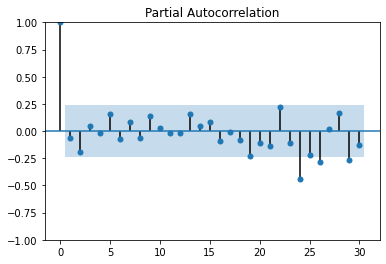

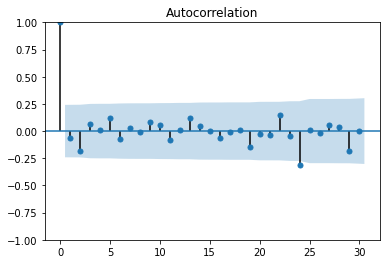

In [ ]:
pacf=plot_pacf(df['TE50011'],lags=30)
acf=plot_acf(df['TE50011'],lags=30)

In [ ]:
model=ARIMA(train['TE50011'],order=(3,1,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                TE50011   No. Observations:                   46
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -483.436
Date:                Mon, 23 Jan 2023   AIC                            976.872
Time:                        07:30:08   BIC                            985.905
Sample:                             0   HQIC                           980.239
                                 - 46                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0631      0.228     -0.276      0.782      -0.511       0.385
ar.L2         -0.3678      0.237     -1.554      0.120      -0.832       0.096
ar.L3          0.0565      0.221      0.256      0.798      -0.377       0.490
ma.L1         -0.8477      0.166     -5.115      0.000      -1.172      -0.523
sigma2      1.401e+08   1.16e-09   1.21e+17      0.000     1.4e+08     1.4e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.32
Prob(Q):                              0.88   Prob(JB):                         0.52
Heteroskedasticity (H):               1.23   Skew:                             0.13
Prob(H) (two-sided):                  0.70   Kurtosis:                         2.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.56e+33. Standard errors may be unstable.
"""

In [ ]:
start=len(train)
end=len(train)+len(val)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)

46    19451.232424
47    19505.253072
48    15262.846098
49    19126.837637
50    17169.755310
51    18680.458300
52    16933.188961
53    18536.244333
54    17292.367442
55    18323.079131
56    17390.546681
57    18213.088181
58    17516.021678
59    18110.722654
60    17593.743032
61    18042.530823
62    17656.218375
63    17988.687883
64    17701.479254
65    17949.696229
Name: predicted_mean, dtype: float64


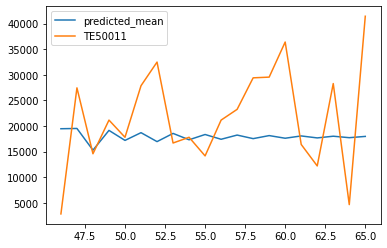

In [ ]:
pred.plot(legend=True)
val['TE50011'].plot(legend=True)